# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [628]:
# Импортируем необходимые для анализа данных библиотеки:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import warnings
warnings.filterwarnings('ignore')

In [629]:
# Импортируем данные из внешнего файла
df = pd.read_csv('telecom_users.csv')

In [630]:
# Выведем выгруженные данные
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [631]:
# Выведем общую информацию об имеющихся данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [632]:
# Судя по справке, пропущенных значений нет ни в одной колонке.
# Всего 5986 строк данных с разной информацией об абонентах сотового оператора.

In [633]:
# Уберём столбцы не несущие информации о свойствах абонента
df.drop(columns=['Unnamed: 0','customerID'], inplace = True)

In [634]:
# Столбец 'TotalCharges' введён как тип 'объект', но автоматическу смену типа не поддерживает.
# Требуется специальная функция для учёта возникающих проблем.

def f_string_to_int(x):
    if '.' in(x):
        x1 = int(x[: x.index('.')])
    elif (x[0]).isdigit():
        x1 = int(x)
    else:
        x1=0
    return x1

df.loc[:,'TotalCharges'] = df['TotalCharges'].apply(f_string_to_int)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973,No


In [635]:
# Создадим вспомогательные списки названий колонок для дальнейшей категоризации данных
columns_list = df.columns.tolist()
columns_list_short = columns_list.copy()
columns_list_short.remove('tenure')
columns_list_short.remove('MonthlyCharges')
columns_list_short.remove('TotalCharges')

In [636]:
# Рассмотрим распределение данных, которые имеют категориальные значения

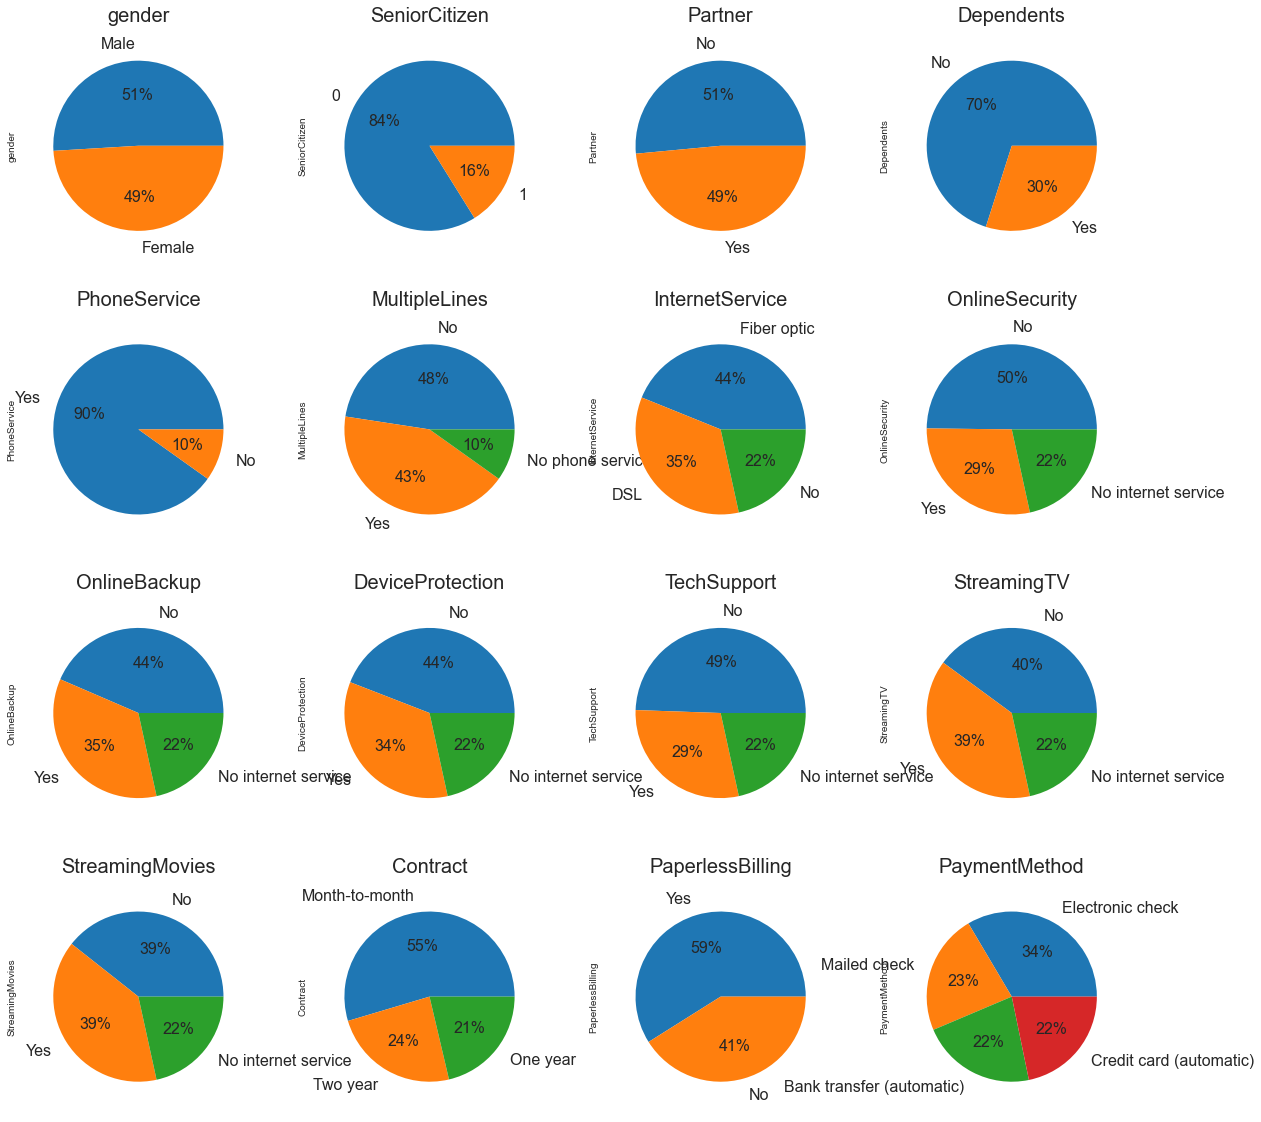

In [637]:
# Выведем круговые диаграммы для всех категориальных данных
f,axs=plt.subplots(4, 4, figsize=(20,20))
column_number = 0
for i_2_1 in range(4):
    for i_2_2 in range(4):
        ax = axs[i_2_1, i_2_2]
        column_name = columns_list_short[column_number]
        fields = df[column_name].value_counts()
        plot = fields.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=0.9, ax=ax)        
        ax.set_title(column_name, fontsize=20)
        column_number +=1
plt.show()

In [638]:
# Отдельно рассмотрим распределение значений целевого параметра - "Churn"

распределение клиентов ушедших от оператора и оставшихся


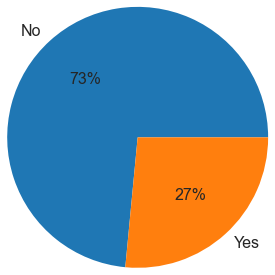

In [639]:
# Построим круговую диаграмму:
fields = df['Churn'].value_counts()
plot = fields.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.1, radius=1.5)
print('распределение клиентов ушедших от оператора и оставшихся')

среднее для  tenure  =  32.5
медианное для  tenure  =  29.0
максимальное для  tenure  =  72
минимальное для  tenure  =  0 

среднее для  MonthlyCharges  =  64.8
медианное для  MonthlyCharges  =  70.4
максимальное для  MonthlyCharges  =  118.75
минимальное для  MonthlyCharges  =  18.25 

среднее для  TotalCharges  =  2293.7
медианное для  TotalCharges  =  1408.0
максимальное для  TotalCharges  =  8684
минимальное для  TotalCharges  =  0 



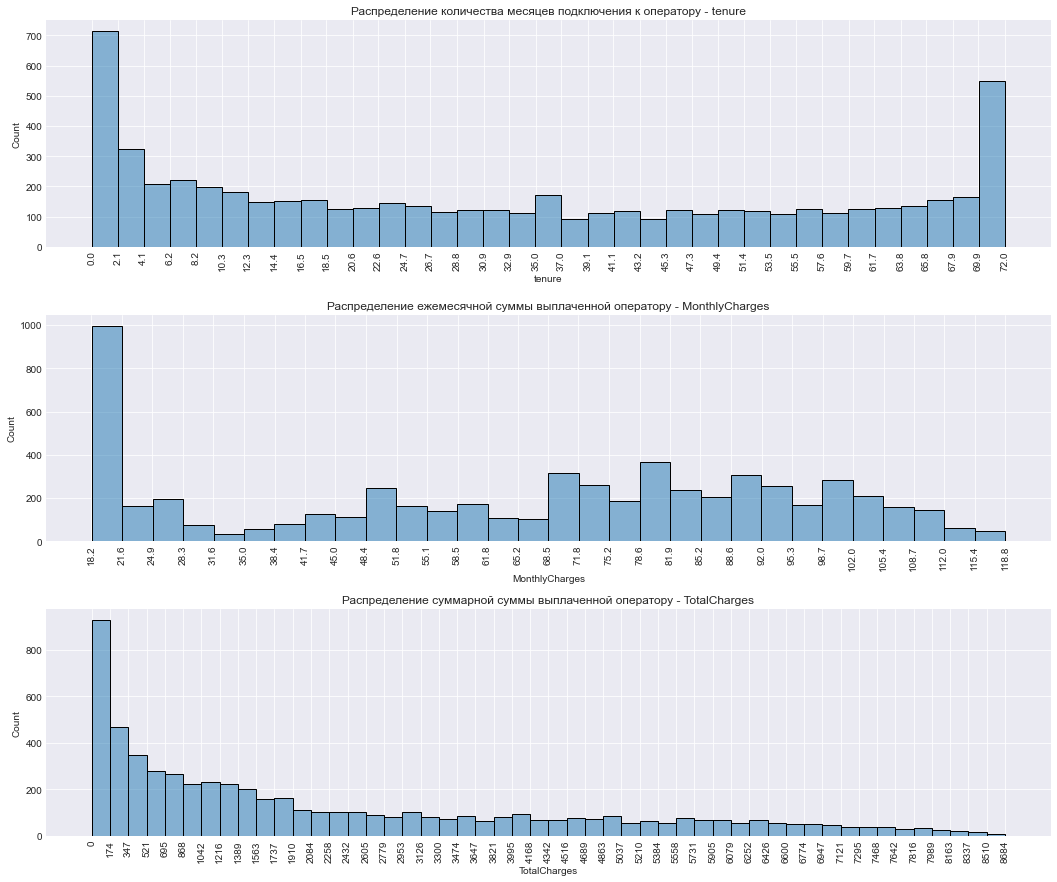

In [640]:
# Выведем для численных параметров среднее, медианное, максимальное и минимальное знаение
# Затем построим столбчатые диаграммы распределеинй имеющихся знаачений

f,axs=plt.subplots(3, 1, figsize=(18,15))
plt.subplots_adjust(hspace=0.3)
bins_for_hist = [35,30,50]
list_of_ranged_columns = ['tenure','MonthlyCharges','TotalCharges']
list_of_titels = ['Распределение количества месяцев подключения к оператору - tenure',
                  'Распределение ежемесячной суммы выплаченной оператору - MonthlyCharges',
                  'Распределение суммарной суммы выплаченной оператору - TotalCharges']
for i_1 in range(3):
    ax = axs[i_1]
    column_name = list_of_ranged_columns[i_1]
    sns.histplot(data=df, x=column_name, ax=ax, alpha=0.5, bins=bins_for_hist[i_1])
    ax.set_title(list_of_titels[i_1])
    
    bin_width_1 = (df[column_name].max() - df[column_name].min()) / bins_for_hist[i_1]
    x_range_1 = [round(i*bin_width_1 + df[column_name].min(), 1) for i in range(bins_for_hist[i_1]+1)]
    ax.set_xticks(x_range_1)
    ax.tick_params(axis = 'x', rotation=90)
    
    print('среднее для ', column_name,' = ', round(df[column_name].mean(),1))
    print('медианное для ', column_name,' = ', df[column_name].median())
    print('максимальное для ', column_name,' = ', df[column_name].max())
    print('минимальное для ', column_name,' = ', df[column_name].min(),'\n', end='\n')
    
plt.show()

# 2. Исследование зависимостей и формулирование гипотез

In [641]:
# Расмотрим значения, которые могут принимать категориальные данные

df_uniq_values_per_columns_dic = {}
for column_name in columns_list_short:
    df_uniq_values_per_columns_dic[column_name] = df[column_name].unique().tolist()
df_uniq_values_per_columns_dic

{'gender': ['Male', 'Female'],
 'SeniorCitizen': [0, 1],
 'Partner': ['Yes', 'No'],
 'Dependents': ['Yes', 'No'],
 'PhoneService': ['Yes', 'No'],
 'MultipleLines': ['Yes', 'No', 'No phone service'],
 'InternetService': ['No', 'Fiber optic', 'DSL'],
 'OnlineSecurity': ['No internet service', 'No', 'Yes'],
 'OnlineBackup': ['No internet service', 'Yes', 'No'],
 'DeviceProtection': ['No internet service', 'Yes', 'No'],
 'TechSupport': ['No internet service', 'No', 'Yes'],
 'StreamingTV': ['No internet service', 'Yes', 'No'],
 'StreamingMovies': ['No internet service', 'No', 'Yes'],
 'Contract': ['Two year', 'Month-to-month', 'One year'],
 'PaperlessBilling': ['No', 'Yes'],
 'PaymentMethod': ['Credit card (automatic)',
  'Bank transfer (automatic)',
  'Electronic check',
  'Mailed check'],
 'Churn': ['No', 'Yes']}

Проведём численную категоризацию данных

In [642]:
# Попробуем организовать её в автоматическом режиме:

df_copy = df.copy()

# Колонка "SeniorCitizen" уже имеет численные значения категорий. Удалим её из списка для работы с остальными колонками
columns_list_short.remove('SeniorCitizen')

# Автоматической функцией присвоим численные значения всем категориальным данным.
for column_name in columns_list_short:
    df_copy[column_name] = df_copy[column_name].astype('category').cat.codes

df_copy.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869,1


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

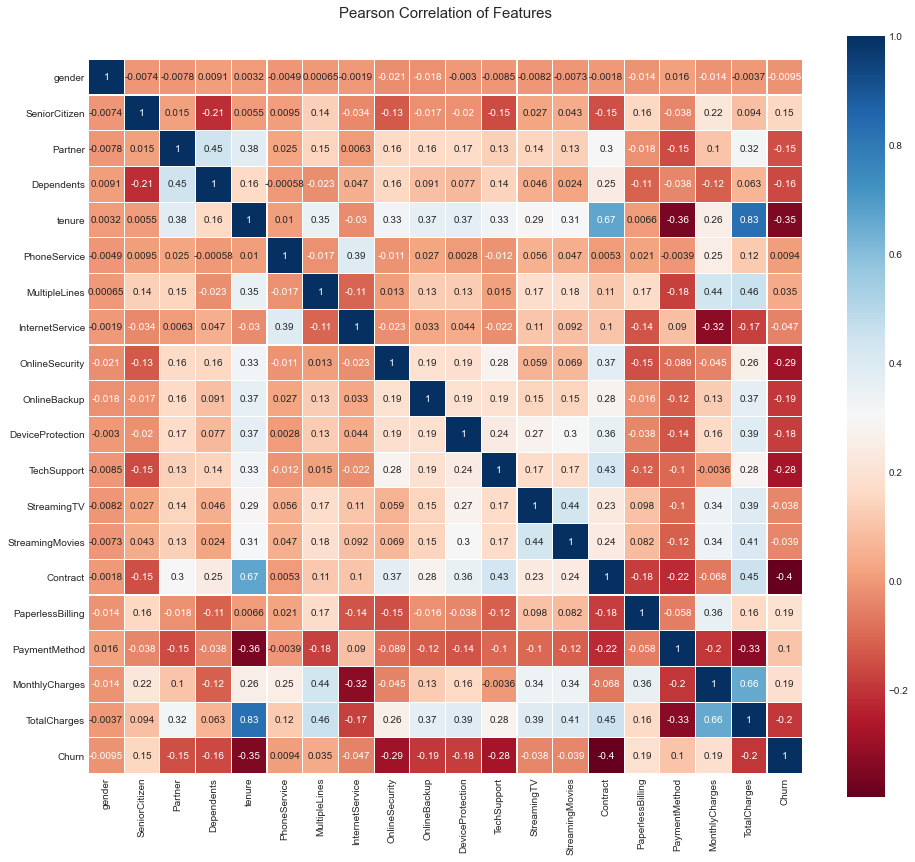

In [643]:
# Рассмотрим корреляционную матрицу:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_copy.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [644]:
# Переведём все категориальные данные в численный вид

for column_name in columns_list_short:
    if any(df[column_name] == "No"):
        df[column_name] = df[column_name].map( {'No': 0,
                                                'Yes': 1,
                                                'No phone service': 2,
                                                'No internet service': 2,
                                                'Fiber optic': 1,
                                                'DSL': 2} ).astype(int)   

df['gender'] = df['gender'].map( {'Male': 0, 'Female': 1} ).astype(int)
df['Contract'] = df['Contract'].map( {'One year': 0, 'Two year': 1, 'Month-to-month': 2} ).astype(int)
df['PaymentMethod'] = df['PaymentMethod'].map( {'Credit card (automatic)': 0,
                                                  'Bank transfer (automatic)': 1,
                                                  'Electronic check': 2,
                                                  'Mailed check': 3} ).astype(int)

In [645]:
# Исходя из собранной информации о распределении значений численных данных проведём численную категоризацию оставшихся клонок.

# Mapping tenure
df.loc[ df['tenure'] <= 2.1, 'tenure'] = 0
df.loc[(df['tenure'] > 2.1) & (df['tenure'] <= 29), 'tenure'] = 1
df.loc[(df['tenure'] > 29) & (df['tenure'] <= 69.8), 'tenure']   = 2
df.loc[ df['tenure'] > 69.8, 'tenure'] = 3
df['tenure'] = df['tenure'].astype(int)

# Mapping MonthlyCharges
df.loc[ df['MonthlyCharges'] <= 21.6, 'MonthlyCharges'] = 0
df.loc[(df['MonthlyCharges'] > 21.6) & (df['MonthlyCharges'] <= 70.4), 'MonthlyCharges'] = 1
df.loc[ df['MonthlyCharges'] > 70.4, 'MonthlyCharges'] = 2
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

# Mapping TotalCharges
df.loc[ df['TotalCharges'] <= 174, 'TotalCharges'] = 0
df.loc[(df['TotalCharges'] > 174) & (df['TotalCharges'] <= 1408), 'TotalCharges'] = 1
df.loc[ df['TotalCharges'] > 1408, 'TotalCharges'] = 2
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [646]:
# Выведем полученный массив данных

In [647]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,3,1,1,0,2,2,2,2,2,2,1,0,0,1,2,0
1,1,0,0,0,2,1,0,1,0,1,1,0,1,0,2,1,0,2,2,0
2,1,1,1,0,2,1,1,1,0,0,0,0,0,0,2,1,1,2,2,1
3,0,0,0,0,1,1,0,2,0,0,0,0,0,1,2,1,2,1,1,0
4,0,0,0,0,0,1,0,2,1,0,1,0,0,0,2,0,2,1,0,0


In [648]:
# Построим корреляционную матрицу для выявления ненужный фичей

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

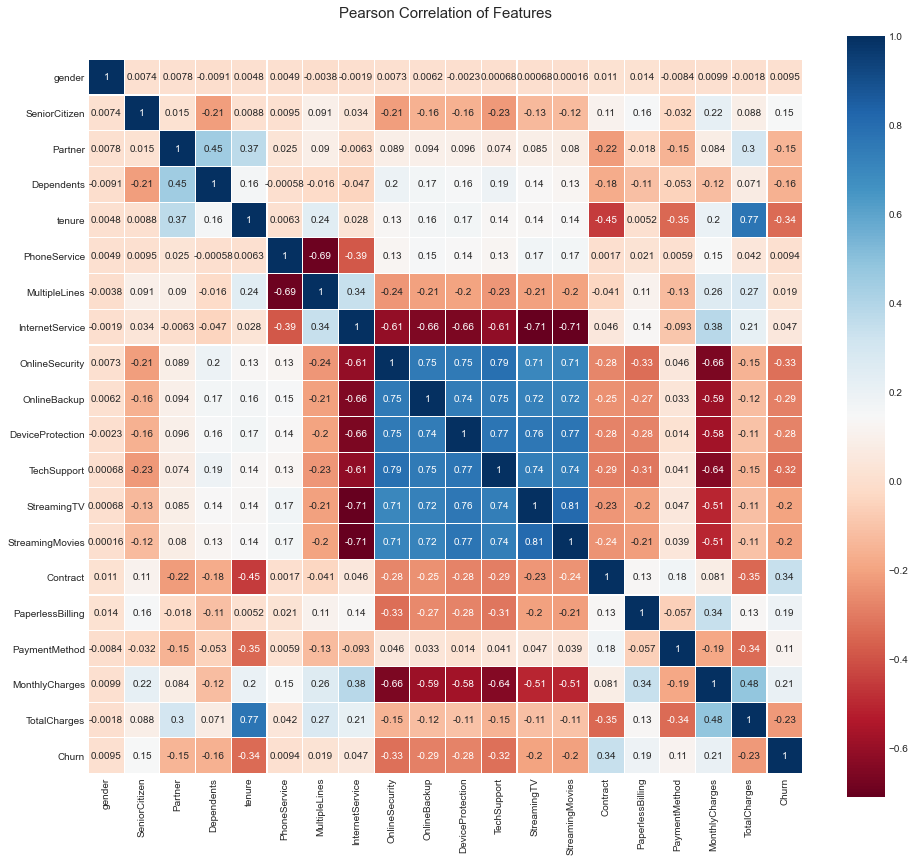

In [649]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [650]:
# Уберём фичи, которые дают корреляцию выше 0.75

In [651]:
df.drop(columns=['TotalCharges','StreamingTV','TechSupport','DeviceProtection', 'OnlineBackup'], inplace = True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

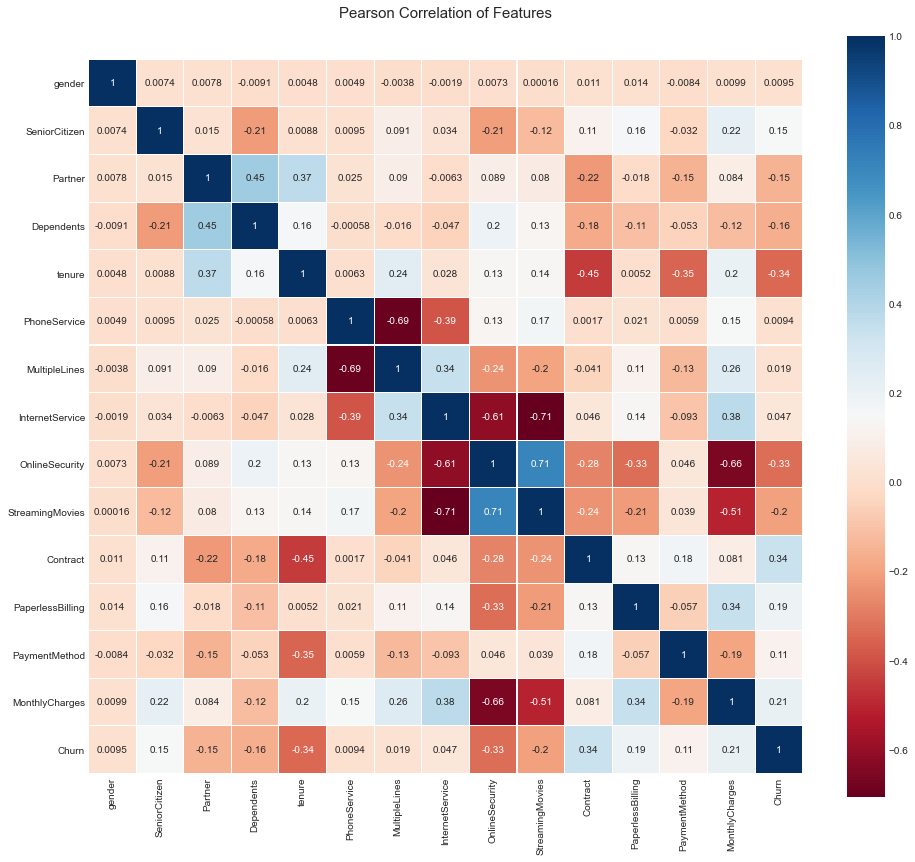

In [652]:
# Получаем следующую итоговую матрицу коррекляций

colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [653]:
# Всего 14 фичей и один целевой параметр
# Далее приступаем к построению моделей предсказания целевого параметра

# 3. Построение моделей для прогнозирования оттока

In [654]:
# Итоговый датафрейм для работы с моделями:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,1,3,1,1,0,2,2,1,0,0,1,0
1,1,0,0,0,2,1,0,1,0,0,2,1,0,2,0
2,1,1,1,0,2,1,1,1,0,0,2,1,1,2,1


In [684]:
# Загрузим необходимые библиотеки:

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     RandomizedSearchCV)

from sklearn.ensemble import (GradientBoostingClassifier,
                             RandomForestClassifier)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.linear_model import RidgeCV, LassoCV

from sklearn.metrics import (confusion_matrix,
                            precision_score,
                            recall_score,
                            accuracy_score,
                            roc_auc_score,
                            f1_score,
                            fbeta_score)

from sklearn.ensemble import StackingClassifier

import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [656]:
# Подготовим функцию для вывода метрик оценки моделей

def metric_values(predictions, test_values, beta_in=2):  
    print('----')
    print('precision_score', round(precision_score(test_values, predictions) * 100, 1))
    print('recall_score', round(recall_score(test_values, predictions) * 100, 1))
    print('roc_auc_score', round(roc_auc_score(test_values, predictions) * 100, 1))
    print('f1_score', round(f1_score(test_values, predictions) * 100, 1))
    print('fbeta_score', round(fbeta_score(test_values, predictions, beta=beta_in) * 100, 1))
    print('tn, fp, fn, tp =', confusion_matrix(test_values, predictions).ravel())
    print('------------------------------------------------------------')


In [657]:
# Подготовим функцию для записи результата работы различных моделей:

df_result = pd.DataFrame(columns = ['name',
                                    'status',
                                    'precision_score',
                                    'recall_score',
                                    'roc_auc_score',
                                    'f1_score',
                                    'fbeta_score',
                                    'tn, fp, fn, tp'])

def metric_record(name_in, status_in, df_in, predictions, test_values, beta_in=2):
    
    list_from_df_in = df_in['name'].tolist()
    
    if name_in in list_from_df_in:
        pos_temp = df_in['name'] == name_in
    else:
        pos_temp = df_in.shape[0]
    
    df_in.loc[pos_temp,:] = [name_in,
                                        status_in,
                                        round(precision_score(test_values, predictions) * 100, 1),
                                        round(recall_score(test_values, predictions) * 100, 1),
                                        round(roc_auc_score(test_values, predictions) * 100, 1),
                                        round(f1_score(test_values, predictions) * 100, 1),
                                        round(fbeta_score(test_values, predictions, beta=beta_in) * 100, 1),
                                        confusion_matrix(test_values, predictions).ravel()
                                        ]
    return df_in

<font color='red'>
Разделение данных на обучающие и валидационные
</font>

In [658]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), 
                                                    df.Churn,
                                                    test_size=0.2,
                                                    random_state=17)

In [659]:
# Создадим базовую модель без настройки данных и параметров для сравнения с последующими моделями

In [660]:
reg = LogisticRegression().fit(x_train, y_train)
# metric_values(reg.predict(x_test), y_test)

In [661]:
df_result = metric_record(name_in = 'reg',
                          status_in = 'LR модель - базовая без настроек',
                          df_in = df_result,
                          predictions = reg.predict(x_test),
                          test_values = y_test,
                          beta_in=2)
df_result

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,reg,LR модель - базовая без настроек,65.7,49.2,70,56.3,51.8,"[802, 81, 160, 155]"


Имеющийся датасет является несбалансированным, количество ответов типа 1 в 4 раза меньше, чем 0.

Это негативно влияет на работу моделей, которые мало учитывают при обучении пложительные ответы.

Для решения этой проблемы применим oversampling - нарастим обучающий датасет данными с положительным ответом, скопировав имеющиеся данные. Сделаем так, чтобы количество положительных и отрицательных ответов сравнялолсь.

In [662]:
x_train['Churn'] = y_train

x_train_class_1 = x_train[y_train == 1].copy()
x_train_class_0 = x_train[y_train == 0].copy()

count_class_0, count_class_1 = y_train.value_counts()

In [663]:
print('count_class_0 = ', count_class_0,'count_class_1 = ',count_class_1)

count_class_0 =  3516 count_class_1 =  1272


In [664]:
x_train_class_1_over = x_train_class_1.sample(count_class_0, replace=True)
x_train = pd.concat([x_train_class_0,x_train_class_1_over], axis=0)
y_train = x_train.copy().loc[:,'Churn']
x_train = x_train.copy().drop(columns=['Churn'])
x_train.shape

(7032, 14)

In [665]:
# Проверим итоговое количество 0х и 1х ответов в датасетах:

In [666]:
y_train.value_counts()

1    3516
0    3516
Name: Churn, dtype: int64

In [667]:
y_test.value_counts()

0    883
1    315
Name: Churn, dtype: int64

<font color='red'>
Обучение базовых алгоритмов
</font>

Приступим к обучению базовых алгоритмов с подбором их основных параметров.

In [668]:
# параметры базовых алгоритмов

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier
# learning_rate - Коэффициент скорости обучения — это параметр градиентных алгоритмов обучения нейронных сетей,
# позволяющий управлять величиной коррекции весов на каждой итерации.

rfc_params = {'n_estimators': range(10, 70, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}
# n_estimators — число «деревьев» в «случайном лесу».
# min_samples_leaf — минимальное число объектов в листьях.

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}
# kernel - ядро
#         linear - линейное ядро - каждая из гиперплоскостей представляет собой прямые линии
#         rbf - Радиальная базисная функция - ядро используется для построения очень сложных границ принятия решений.
#                                 функция уменьшается в цене, когда она удаляется от центра.
#                                 (Центр в данном случае является опорным вектором.)
#                                 Это объясняет, почему границы решений имеют форму колокольчика, когда мы его визуализируют
#         'C' - параметр штрафа - Высокое значение говорит алгоритму, что вам важнее правильно классифицировать все
#                                 тренировочные точки, чем оставлять пространство для маневра для будущих данных.

lr_params = {'C': np.arange(0.5, 1, 0.1)}
#         'C' - параметр штрафа - параметр регулризации. Выше С - меньше регуляризация

KNN_params = {'n_neighbors': range(2, 10, 1)}
#          'n_neighbors' - количество соседних элементов для определения класса элементов   
GNB_params = {'var_smoothing': np.logspace(0,1, num=100)}
#             'var_smoothing' - var_smoothing искусственно добавляет определенное пользователем
#                               значение к дисперсии распределения.
#                               Это существенно расширяет (или "сглаживает") кривую и учитывает больше выборок,
#                               которые находятся дальше от среднего распределения.
skf = StratifiedKFold(n_splits=5, random_state=17)
            # StratifiedKFold представляет собой разновидность k-фолдовой кратности,
            # которая возвращает стратифицированные фолды:
            # каждый набор содержит примерно такой же процент выборок каждого целевого класса, что и полный набор.

In [669]:
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(max_depth=2, random_state=17)
svc = SVC(degree=3, random_state=17)
Lr = LogisticRegression(random_state=17)
KNN = KNeighborsClassifier(n_neighbors=5)
GNB = GaussianNB()

ridge_base = RidgeCV()

models_list_1 = [gbc, rfc, svc, Lr, KNN, GNB, ridge_base]

Все алгоритмы будем настраивать на метрику fbeta_score, т.к. параметр recall важнее для данной задачи

In [670]:
from sklearn.metrics import fbeta_score, make_scorer
scorer_fbeta = make_scorer(fbeta_score, beta=2)

In [671]:
gbc_tree = GridSearchCV(gbc, gbc_params, cv=skf, scoring=scorer_fbeta)
rfc_tree = GridSearchCV(rfc, rfc_params, cv=skf, scoring=scorer_fbeta)
svc_tree = GridSearchCV(svc, svc_params, cv=skf, scoring=scorer_fbeta)
Lr_tree = GridSearchCV(Lr, lr_params, cv=skf, scoring=scorer_fbeta)
KNN_tree = GridSearchCV(KNN, KNN_params, cv=skf, scoring=scorer_fbeta)
GNB_tree = GridSearchCV(GNB, GNB_params, cv=skf, scoring=scorer_fbeta)

In [672]:
ridge_base_tree = RidgeCV(alphas = [2, 1, 0.1, 0.01, 0.001,0.0001])
ridge_base_tree_model = ridge_base_tree.fit(x_train, y_train)
ridge_base_tree.alpha_

2.0

In [673]:
gbc_tree_best_params = {'learning_rate': 0.3}
rfc_tree_best_params = {'min_samples_leaf': 1, 'n_estimators': 10}
svc_tree_best_params = {'C': 0.3, 'kernel': 'rbf'}
Lr_tree_best_params = {'C': 0.5}
KNN_tree_best_params = {'n_neighbors': 5}
GNB_tree_best_params = {'var_smoothing': 1.0}
ridge_alpha = 2

In [674]:
gbc_tree_model = GradientBoostingClassifier(**gbc_tree_best_params).fit(x_train, y_train)
rfc_tree_model = RandomForestClassifier(**rfc_tree_best_params).fit(x_train, y_train)
svc_tree_model = SVC(**svc_tree_best_params).fit(x_train, y_train)
Lr_tree_model = LogisticRegression(**Lr_tree_best_params).fit(x_train, y_train)
KNN_tree_model = KNeighborsClassifier(**KNN_tree_best_params).fit(x_train, y_train)
GNB_tree_model = GaussianNB(**GNB_tree_best_params).fit(x_train, y_train)
ridge_base_tree_model = RidgeCV(alphas = [ridge_alpha]).fit(x_train, y_train)


# print('!!___gbc_tree_model')
gbc_tree_model_predictions = gbc_tree_model.predict(x_test)
# metric_values(gbc_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'gbc_tree_model',
                          status_in = 'GBC с подбором базовых параметров',
                          df_in = df_result,
                          predictions = gbc_tree_model_predictions,
                          test_values = y_test)

# print('!!___rfc_tree_model')
rfc_tree_model_predictions = rfc_tree_model.predict(x_test)
# metric_values(rfc_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'rfc_tree_model',
                          status_in = 'rfc с подбором базовых параметров',
                          df_in = df_result,
                          predictions = rfc_tree_model_predictions,
                          test_values = y_test)

# print('!!___svc_tree_model')
svc_tree_model_predictions = svc_tree_model.predict(x_test)
# metric_values(svc_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'svc_tree_model',
                          status_in = 'SVC с подбором базовых параметров',
                          df_in = df_result,
                          predictions = svc_tree_model_predictions,
                          test_values = y_test)

# print('!!___Lr_tree_model')
Lr_tree_model_predictions = Lr_tree_model.predict(x_test)
# metric_values(Lr_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'Lr_tree_model',
                          status_in = 'Lr с подбором базовых параметров',
                          df_in = df_result,
                          predictions = Lr_tree_model_predictions,
                          test_values = y_test)

# print('!!___KNN_tree_model')
KNN_tree_model_predictions = KNN_tree_model.predict(x_test)
# metric_values(KNN_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'KNN_tree_model',
                          status_in = 'KNN с подбором базовых параметров',
                          df_in = df_result,
                          predictions = KNN_tree_model_predictions,
                          test_values = y_test)

# print('!!___GNB_tree_model')
GNB_tree_model_predictions = GNB_tree_model.predict(x_test)
# metric_values(GNB_tree_model_predictions, y_test)
df_result = metric_record(name_in = 'GNB_tree_model',
                          status_in = 'GNB с подбором базовых параметров',
                          df_in = df_result,
                          predictions = GNB_tree_model_predictions,
                          test_values = y_test)

# print('!!___ridge_base_tree_model')
ridge_base_tree_model_predictions = ridge_base_tree_model.predict(x_test)
ridge_base_tree_model_predictions_poss = ridge_base_tree_model_predictions > 0.5
# metric_values(ridge_base_tree_model_predictions_poss, y_test)
df_result = metric_record(name_in = 'ridge_base_tree_model',
                          status_in = 'Ridge модель с подобранным альфа',
                          df_in = df_result,
                          predictions = ridge_base_tree_model_predictions_poss,
                          test_values = y_test)

df_result

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,reg,LR модель - базовая без настроек,65.7,49.2,70,56.3,51.8,"[802, 81, 160, 155]"
1,gbc_tree_model,GBC с подбором базовых параметров,48.7,75.2,73.5,59.1,67.8,"[633, 250, 78, 237]"
2,rfc_tree_model,rfc с подбором базовых параметров,49.1,61,69.2,54.4,58.1,"[684, 199, 123, 192]"
3,svc_tree_model,SVC с подбором базовых параметров,46.2,78.4,72.9,58.1,68.8,"[595, 288, 68, 247]"
4,Lr_tree_model,Lr с подбором базовых параметров,49,73.7,73.2,58.9,66.9,"[642, 241, 83, 232]"
5,KNN_tree_model,KNN с подбором базовых параметров,43.5,58.1,65.6,49.7,54.4,"[645, 238, 132, 183]"
6,GNB_tree_model,GNB с подбором базовых параметров,41.5,81.6,70.2,55,68.4,"[520, 363, 58, 257]"
7,ridge_base_tree_model,Ridge модель с подобранным альфа,47.4,74.6,72.5,58,66.9,"[622, 261, 80, 235]"


<font color='red'>
Попробуем использовать стекинг для повышения точности модели
</font>

In [675]:
# в качестве мета-алгоритма используем XGBoost

# XGBoost - это реализация деревьев решений с градиентным усилением, разработанных для скорости и производительности.

# Каждый предиктор в ансамбле построенпоследовательно, один за другим -
# скаждый фокусируется больше на ошибках своих предшественников.

# Каждый раз, когда новый предиктор обучается, алгоритм назначает более высокие веса (из нового набора весов)
# обучающим экземплярам,которые предыдущий предиктор ошибся.
# Таким образом, у этого нового предиктора теперь больше стимулов для решения более сложных прогнозов.

# Модели XGBoost можно использовать непосредственно в среде scikit-learn с использованием классов-обёрток,
# XGBClassifierдля классификации иXGBRegressorдля проблем регрессии.

# Мы используем XGBClassifier
meta = XGBClassifier(n_estimators=40)

для начала найдём лучшие параметры метаалгоритма

In [683]:
xgb_params = {'n_estimators': range(10, 100, 10),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 2),
              'subsample': np.arange(0.1, 1., 0.2)}

# n_estimators — число «деревьев» в «случайном лесу».
# eta --> learning_rate
# min_child_weight - - Минимальная сумма веса экземпляра (гессиана), необходимая для ребенка.
#                         Используется для контроля надгонки.
#                         Более высокие значения не позволяют модели изучать отношения,
#                         которые могут быть очень специфичными для конкретной выборки, выбранной для дерева.
#                         Слишком высокие значения могут привести к недостаточной подгонке,
#                         поэтому его следует настраивать с помощью CV. Типичные значения: 1–5
#                             "stop trying to split once your sample size in a node goes below a given threshold"
# "subsample" - часть обучающего набора данных (выбранная случайно),
#                 которая будет использована для обучения каждого дерева

In [677]:
meta_1 = XGBClassifier(n_estimators=40, eval_metric='logloss', random_state=17)
meta_1_tree = GridSearchCV(meta_1, xgb_params, cv=5)

predictions_list = [gbc_tree_model_predictions,
                    rfc_tree_model_predictions,
                    svc_tree_model_predictions,
                    Lr_tree_model_predictions,
                    KNN_tree_model_predictions,
                    GNB_tree_model_predictions]

In [678]:
# подготовим метаматрицу ответов базовых алгоритмов
meta_mtrx = np.empty((x_test.shape[0], len(predictions_list)))
for n, predictions in enumerate(predictions_list):
    meta_mtrx[:, n] = predictions            

In [679]:
meta_1_tree_best_params = {'eta': 0.7,
                           'min_child_weight': 3,
                           'n_estimators': 10,
                           'subsample': 0.3}

<font color='red'>
Используем функцию для стекинга с известными и неизвестными валидационными данными.
</font>

Если вавлидационные данные известны, то обучающие данные дополнительно делятся на обучающие и валидационные

In [680]:
estimators_ = [
    ('gbc_fin_', gbc_tree_model),
    ('rfc_fin_', rfc_tree_model),
    ('svc_fin_', svc_tree_model),
    ('Lr_fin_', Lr_tree_model),
    ('KNN_fin_', KNN_tree_model),
    ('GNB_fin_', GNB_tree_model)   
            ]

final_layer = StackingClassifier(
                                estimators=estimators_,
                                final_estimator=XGBClassifier(**meta_1_tree_best_params)
                                )

final_layer.fit(x_train, y_train)

final_layer_predict = final_layer.predict(x_test)
final_layer_predict_poss = final_layer_predict > 0.5

[08:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [681]:
df_result = metric_record(name_in = 'final_layer',
                          status_in = 'StackingClassifier - модель стекинга',
                          df_in = df_result,
                          predictions = final_layer_predict_poss,
                          test_values = y_test)

df_result.tail(1)

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
8,final_layer,StackingClassifier - модель стекинга,49.6,62.9,70,55.5,59.7,"[682, 201, 117, 198]"


<font color='red'>
Попробуем настроить модель rfc
</font>

In [687]:

# Мы будем заниматься подбором следующих гиперпараметров  для rfc:

# n_estimators — число «деревьев» в «случайном лесу».
# max_features — число признаков для выбора расщепления.
# max_depth — максимальная глубина деревьев.
# min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
# min_samples_leaf — минимальное число объектов в листьях.
# bootstrap — использование для построения деревьев подвыборки с возвращением

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 15)] # по умолчанию - 100
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

rfc_for_tune_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rfc_for_tune = RandomForestClassifier()

In [702]:
rs_df = pd.read_csv('rs_df.csv', sep='+', index_col='index')
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
index,,,,,,,,
0,935,12,7,sqrt,11,False,0.786547,1
1,485,18,7,sqrt,12,False,0.785552,2
2,228,23,7,log2,14,False,0.785125,3
3,550,23,2,sqrt,15,True,0.781286,4
4,292,39,2,sqrt,9,False,0.777730,5
5,742,18,12,log2,14,False,0.777304,6
6,357,18,7,sqrt,8,False,0.777019,7
7,1000,39,2,sqrt,13,True,0.774602,8
8,100,23,12,sqrt,12,False,0.774317,9


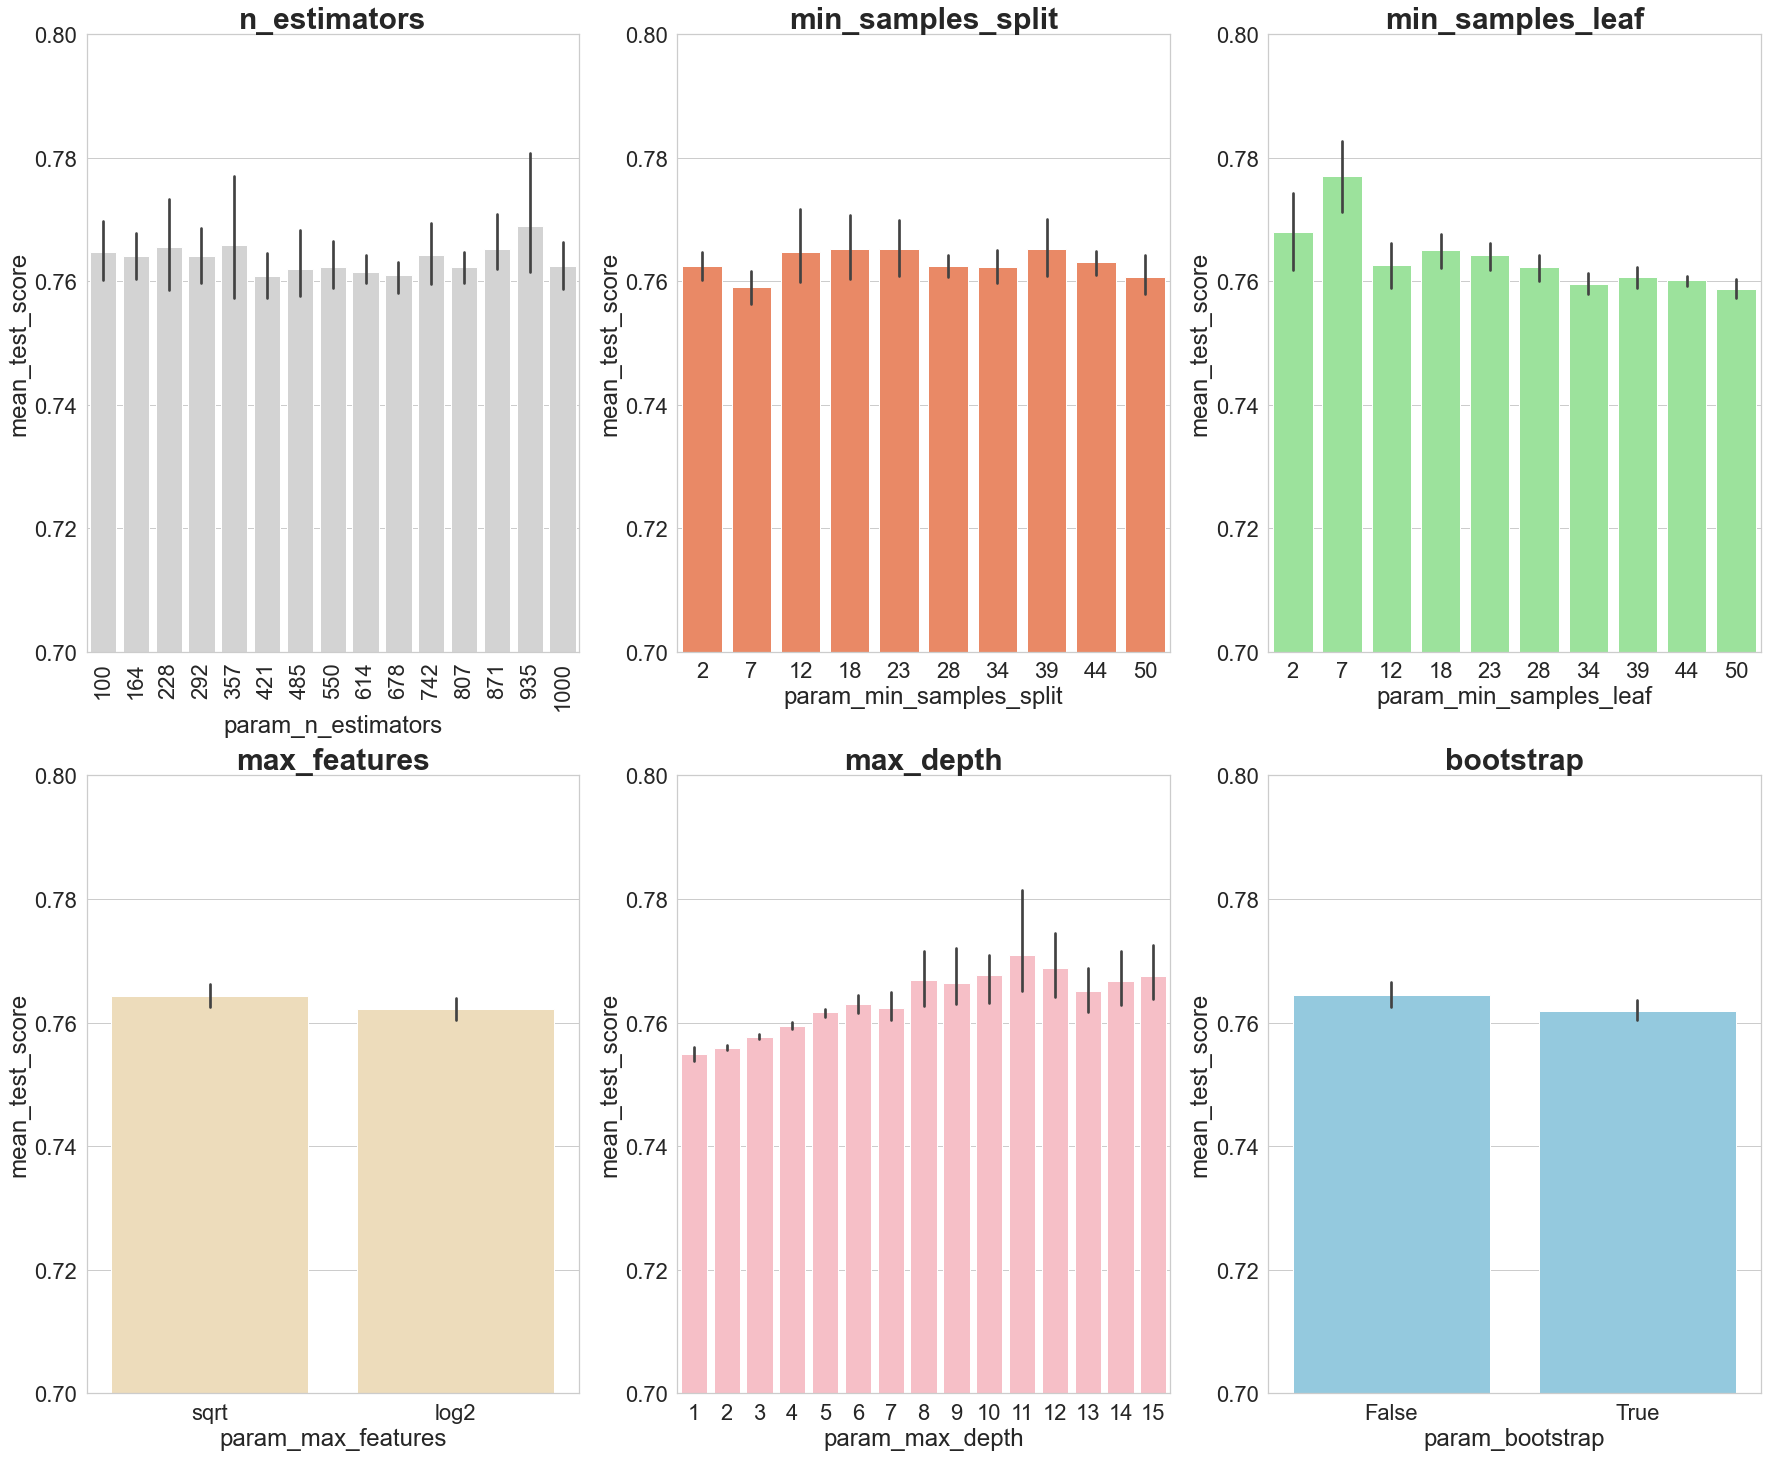

In [703]:
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.7,.8])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
axs[0,0].tick_params(axis='x', labelrotation= 90)
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.7,.8])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.7,.8])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.7,.8])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.7,.8])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.7,.8])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [698]:
n_estimators = [230,350,935]
max_features = ['sqrt']
max_depth = [10,11]
min_samples_split = [12,19,26,33,39]
min_samples_leaf = [2,4,6,7,8]
bootstrap = [False]
rfc_for_tune_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [704]:
rfc_tunned_best_params = {'bootstrap': False,
                             'max_depth': 11,
                             'max_features': 'sqrt',
                             'min_samples_leaf': 2,
                             'min_samples_split': 12,
                             'n_estimators': 350}

In [705]:
rfc_tunned = RandomForestClassifier(**rfc_tunned_best_params).fit(x_train, y_train)

In [706]:
# print('!!___rfc_tunned_model')
rfc_tunned_predictions = rfc_tunned.predict(x_test)
df_result = metric_record(name_in = 'rfc_tunned',
                          status_in = 'rfc с глубоким подбором параметров',
                          df_in = df_result,
                          predictions = rfc_tunned_predictions,
                          test_values = y_test)
df_result.tail(1)

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
9,rfc_tunned,rfc с глубоким подбором параметров,49.7,69.8,72.3,58,64.6,"[660, 223, 95, 220]"


<font color='red'>
Модель случайных деревьев после настройки гиперпараметров стала точнее, но точность все ещё ниже желаемой.
Попробуем настроить модель xgboost с повышением значимости ответов отвечающих за полноту.
</font>

Для начала решим модель с автоматическим подбором параметров и без указания веса решений.

In [710]:
import xgboost as xgb

# будем использовать интерфейс библиотеки xgboost.

# В этом интерфейсе для обучения XGBoost данные должны быть представлены в виде объекта
# DMatrix - внутренней структуры данных, используемой библиотекой XGBoost,
# которая оптимизирована как по эффективности работы с памятью, так и по скорости обучения.

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

# В методе train есть параметр evals - список валидационных наборов данных,
# для которых будут оцениваться показатели во время обучения.

evals = [(dtest, 'test'), (dtrain, 'train')]

In [711]:
# Также заранее определим параметры алгоритма:

# бинарная классификация - 'objective': 'binary:logistic'
# глубина деревьев - 'max_depth': 3
# шаг градиентного спуска (скорость обучения) - 'eta': 0.1
# количество итераций бустинга - num_rounds = 60

xgb_params = {'objective': 'binary:logistic',
              'max_depth': 3,
              'eta': 0.1}

xgb_num_rounds = 60

In [714]:
xgb_model_base = xgb.train(xgb_params, dtrain, xgb_num_rounds, evals=evals)

[08:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	test-logloss:0.66455	train-logloss:0.66270
[1]	test-logloss:0.64132	train-logloss:0.63772
[2]	test-logloss:0.62272	train-logloss:0.61699
[3]	test-logloss:0.60722	train-logloss:0.59966
[4]	test-logloss:0.59466	train-logloss:0.58506
[5]	test-logloss:0.58399	train-logloss:0.57271
[6]	test-logloss:0.57535	train-logloss:0.56221
[7]	test-logloss:0.56677	train-logloss:0.55251
[8]	test-logloss:0.56004	train-logloss:0.54440
[9]	test-logloss:0.55361	train-logloss:0.53721
[10]	test-logloss:0.54839	train-logloss:0.53086
[11]	test-logloss:0.54378	train-logloss:0.52540
[12]	test-logloss:0.54042	train-logloss:0.52083
[13]	test-logloss:0.53682	train-logloss:0.51667
[14]	test-logloss:0.53388	tr

In [715]:
# Найдём решение алгоритма

# С помощью метода predict получим предсказания для тестовых данных.
# Так как алгоритм возвращает вероятности, получите бинарную матрицу значений этих вероятностей,
# элементы которой при полученной вероятности > 0.5 равны True, а при вероятности <= 0.5 равны False.

xgb_model_base_predictions = xgb_model_base.predict(dtest)
xgb_model_base_predictions_poss = predictions > 0.5

In [716]:
# print('!!___rfc_tunned_model')
df_result = metric_record(name_in = 'xgb_model_base',
                          status_in = 'xgb с базовыми параметрами',
                          df_in = df_result,
                          predictions = xgb_model_base_predictions_poss,
                          test_values = y_test)
df_result.tail(1)

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
10,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"


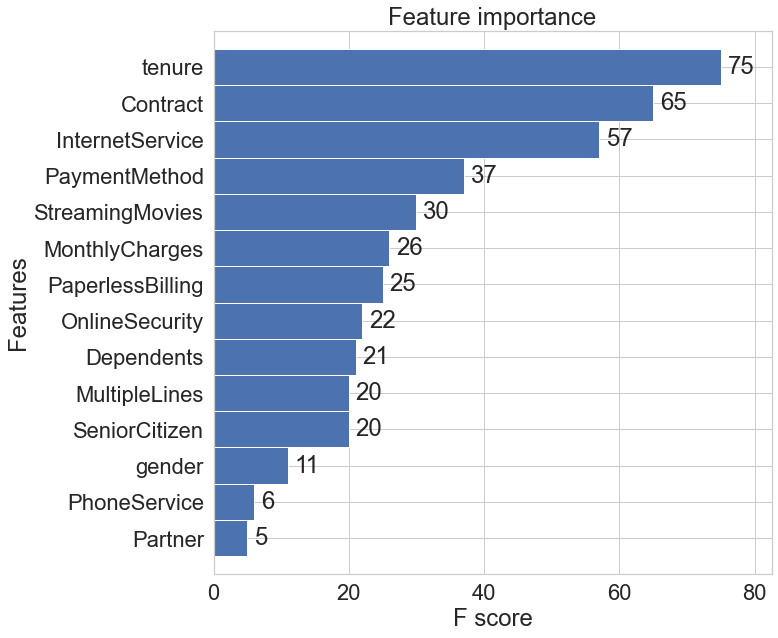

In [726]:
# В качестве метрики оценки важности признаков в XGBoost используется F-score,
# которая вычисляется на основе того, как часто делалось разбиение по данному признаку

# xgb.plot_importance(xgb_model_base, height=1)
ax = xgb.plot_importance(xgb_model_base, height=1)
fig = ax.figure
fig.set_size_inches(10, 10)

Попробуем отказаться от лишних фичей, согласно рекомендациям построенной модели

In [728]:

dtrain_short = xgb.DMatrix(x_train.copy().drop(columns=['Partner','PhoneService']), y_train)
dtest_short = xgb.DMatrix(x_test.copy().drop(columns=['Partner','PhoneService']), y_test)

xgb_params_short = {'objective': 'binary:logistic',
                      'max_depth': 3,
                      'eta': 0.1}

xgb_num_rounds_short = 60
xgb_model_short = xgb.train(xgb_params_short, dtrain_short, xgb_num_rounds_short)
predictions_short = xgb_model_short.predict(dtest_short)
predictions_poss_short = predictions_short > 0.5
# metric_values(predictions_poss_short, y_test)

# xgb.plot_importance(xgb_model_short)

df_result = metric_record(name_in = 'xgb_model_short',
                          status_in = 'xgb с сокращением фичей',
                          df_in = df_result,
                          predictions = predictions_poss_short,
                          test_values = y_test)
df_result.tail(2)

[08:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
10,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
11,xgb_model_short,xgb с сокращением фичей,47.8,76.5,73.4,58.9,68.3,"[620, 263, 74, 241]"


Точность модели снизилась после удаления лишних фичей. Попробуем понизить размерность

In [729]:
# x_train_short = df.copy().drop(columns=['Churn', 'Partner','PhoneService', 'Dependents', 'gender'])
x_tsne = tsne_transformer = TSNE(n_components=3).fit_transform(df.copy().drop(columns=['Churn']))
x_train_reduct, x_test_reduct, y_train_reduct, y_test_reduct = train_test_split(x_tsne, 
                                                                                df.Churn,
                                                                                test_size=0.2,
                                                                                random_state=17)

In [730]:
dtrain_short_tsne = xgb.DMatrix(x_train_reduct, y_train_reduct)
dtest_short_tsne = xgb.DMatrix(x_test_reduct, y_test_reduct)

xgb_params_short_tsne = {'objective': 'binary:logistic',
                          'max_depth': 3,
                          'eta': 0.1}

xgb_num_rounds_short_tsne = 60
xgb_model_short_tsne = xgb.train(xgb_params_short_tsne, dtrain_short_tsne, xgb_num_rounds_short_tsne)
predictions_short_tsne = xgb_model_short_tsne.predict(dtest_short_tsne)
predictions_poss_short_tsne = predictions_short_tsne > 0.5
# metric_values(predictions_poss_short_tsne, y_test)

# xgb.plot_importance(xgb_model_short_tsne)
df_result = metric_record(name_in = 'xgb_model_short_tsne',
                          status_in = 'xgb с понижнием размерности - tsne',
                          df_in = df_result,
                          predictions = predictions_poss_short_tsne,
                          test_values = y_test)
df_result.tail(3)

[08:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
10,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
11,xgb_model_short,xgb с сокращением фичей,47.8,76.5,73.4,58.9,68.3,"[620, 263, 74, 241]"
12,xgb_model_short_tsne,xgb с понижнием размерности - tsne,68.2,34,64.2,45.3,37.8,"[833, 50, 208, 107]"


In [732]:
pca = PCA(n_components=3).fit(df.copy().drop(columns=['Churn']))
X_pca = pca.transform(df.copy().drop(columns=['Churn']))
x_train_reduct, x_test_reduct, y_train_reduct, y_test_reduct = train_test_split(X_pca, 
                                                                                df.Churn,
                                                                                test_size=0.2,
                                                                                random_state=17)

In [733]:
dtrain_short_pca = xgb.DMatrix(x_train_reduct, y_train_reduct)
dtest_short_pca = xgb.DMatrix(x_test_reduct, y_test_reduct)

# evals_short_tsne = [(dtest_short_tsne, 'test'), (dtrain_short_tsne, 'train')]
xgb_params_short_pca = {'objective': 'binary:logistic',
              'max_depth': 3,
              'eta': 0.1}

xgb_num_rounds_short_pca = 60
xgb_model_short_pca = xgb.train(xgb_params_short_pca, dtrain_short_pca, xgb_num_rounds_short_pca)
predictions_short_pca = xgb_model_short_pca.predict(dtest_short_pca)
predictions_poss_short_pca = predictions_short_pca > 0.5
# metric_values(predictions_poss_short_tsne, y_test)

# xgb.plot_importance(xgb_model_short_tsne)
df_result = metric_record(name_in = 'xgb_model_short_pca',
                          status_in = 'xgb с понижнием размерности - pca',
                          df_in = df_result,
                          predictions = predictions_poss_short_pca,
                          test_values = y_test)
df_result.tail(4)

[08:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
10,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
11,xgb_model_short,xgb с сокращением фичей,47.8,76.5,73.4,58.9,68.3,"[620, 263, 74, 241]"
12,xgb_model_short_tsne,xgb с понижнием размерности - tsne,68.2,34,64.2,45.3,37.8,"[833, 50, 208, 107]"
13,xgb_model_short_pca,xgb с понижнием размерности - pca,64.9,39.4,65.9,49,42.7,"[816, 67, 191, 124]"


Понижение размерности ухудшило точность модели, вернёмся к данным без понижения размерности:

Перейдём к заданию весов классов

In [164]:
# Инициализируйте параметр scale_pos_weight как соотношение числа объектов двух классов.
# Для этого число объектов класса 0 разделите на число объектов класса 1.
# Добавьте в словарь параметров алгоритма params пару с ключом 'scale_pos_weight' и значением,
# равным полученному соотношению классов

In [165]:
# dtrain_short = xgb.DMatrix(x_train.copy().drop(columns=['Partner','PhoneService', 'Dependents', 'gender']), y_train)
# dtest_short = xgb.DMatrix(x_test.copy().drop(columns=['Partner','PhoneService', 'Dependents', 'gender']), y_test)

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

spec_ratio = sum(y_train == 0) / sum(y_train == 1)
# spec_ratio

In [735]:
# начение параметра scale_pos_weight надо выбирать в зависимости от желаемого соотношения между точностью и полнотой. 

# evals_short = [(dtest_short, 'test'), (dtrain_short, 'train')]
xgb_params_spec_ratio = {'objective': 'binary:logistic',
                    'max_depth': 3,
                    'eta': 0.1,
                    'scale_pos_weight': spec_ratio/0.5}

# xgb_num_rounds_short = 60
xgb_model_spec_ratio = xgb.train(xgb_params_spec_ratio, dtrain, xgb_num_rounds)
predictions_xgb_model_spec_ratio = xgb_model_spec_ratio.predict(dtest)
predictions_poss_xgb_model_spec_ratio = predictions_xgb_model_spec_ratio > 0.5
# metric_values(predictions_poss_short, y_test)

# xgb.plot_importance(xgb_model_short)

df_result = metric_record(name_in = 'xgb_model_spec_ratio',
                          status_in = 'xgb с заданием веса scale_pos_weight',
                          df_in = df_result,
                          predictions = predictions_poss_xgb_model_spec_ratio,
                          test_values = y_test)
df_result.tail(5)

[08:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
10,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
11,xgb_model_short,xgb с сокращением фичей,47.8,76.5,73.4,58.9,68.3,"[620, 263, 74, 241]"
12,xgb_model_short_tsne,xgb с понижнием размерности - tsne,68.2,34,64.2,45.3,37.8,"[833, 50, 208, 107]"
13,xgb_model_short_pca,xgb с понижнием размерности - pca,64.9,39.4,65.9,49,42.7,"[816, 67, 191, 124]"
14,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"


<font color='red'>
Настроим параметры xgb модели
</font>

 Начнём с обширной подборки параметров с применением случайного анализатора

In [806]:
XGB_cf_tree_model_best_params = {'subsample': 0.9,
                                 'scale_pos_weight': 1.5,
                                 'n_estimators': 350,
                                 'min_samples_split': 12,
                                 'min_samples_leaf': 8,
                                 'min_child_weight': 3,
                                 'max_features': 'log2',
                                 'max_depth': 11,
                                 'eta': 0.5,
                                 'bootstrap': False}

In [807]:
# применим подобранные параметры

In [808]:
spec_params = XGB_cf_tree_model_best_params
spec_params['objective'] = 'binary:logistic'

xgb_model_fin = xgb.train(spec_params,
                            dtrain)
predictions_xgb_model_fin = xgb_model_fin.predict(dtest)
predictions_xgb_model_fin_poss = predictions_xgb_model_fin > 0.5

df_result = metric_record(name_in = 'xgb_model_fin',
                          status_in = 'xgb с глубокой случайной настройкой параметров и весом',
                          df_in = df_result,
                          predictions = predictions_xgb_model_fin_poss,
                          test_values = y_test)
df_result.tail(2)

[22:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
14,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"
15,xgb_model_fin,xgb с глубокой случайной настройкой параметров...,47.3,72.4,71.8,57.2,65.4,"[629, 254, 87, 228]"


Результаты получились хуже, чем без настройки параметров, проведём настройку параметров другим способом

In [ ]:
xgb_CV_params = {'n_estimators': range(25, 35, 5),
                 'max_depth': np.arange(1,3, 1),
                'eta': np.arange(0.5, 1.3, .2),
                'min_child_weight': range(1, 5, 2),
                'subsample': np.arange(0.1, 0.7, 0.2),
                'scale_pos_weight': np.arange(0.75, 1.25, 0.25)
                }

In [ ]:
XGB_cf = XGBClassifier(eval_metric='auc', random_state=17)
XGB_cf_tree = GridSearchCV(XGB_cf,
                           xgb_CV_params,
                           cv=skf,
                           scoring=scorer_fbeta)

In [805]:
XGB_cf_tree_model_best_params_2 = {'eta': 0.7,
                                 'max_depth': 2,
                                 'min_child_weight': 1,
                                 'n_estimators': 30,
                                 'scale_pos_weight': 1.0,
                                 'subsample': 0.5000000000000001}

In [809]:
spec_params = XGB_cf_tree_model_best_params_2
spec_params['objective'] = 'binary:logistic'

xgb_model_fin_2 = xgb.train(spec_params,
                            dtrain)
predictions_xgb_model_fin_2 = xgb_model_fin_2.predict(dtest)
predictions_xgb_model_fin_2_poss = predictions_xgb_model_fin_2 > 0.5

df_result = metric_record(name_in = 'xgb_model_fin_2',
                          status_in = 'xgb с короткой но точной настройкой параметров',
                          df_in = df_result,
                          predictions = predictions_xgb_model_fin_2_poss,
                          test_values = y_test)
df_result.tail(3)

[22:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
14,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"
15,xgb_model_fin,xgb с глубокой случайной настройкой параметров...,47.3,72.4,71.8,57.2,65.4,"[629, 254, 87, 228]"
16,xgb_model_fin_2,xgb с короткой но точной настройкой параметров,48.5,74.9,73.2,58.9,67.5,"[632, 251, 79, 236]"


# 4. Сравнение качества моделей 

In [810]:
df_result

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,reg,LR модель - базовая без настроек,65.7,49.2,70,56.3,51.8,"[802, 81, 160, 155]"
1,gbc_tree_model,GBC с подбором базовых параметров,48.7,75.2,73.5,59.1,67.8,"[633, 250, 78, 237]"
2,rfc_tree_model,rfc с подбором базовых параметров,49.1,61,69.2,54.4,58.1,"[684, 199, 123, 192]"
3,svc_tree_model,SVC с подбором базовых параметров,46.2,78.4,72.9,58.1,68.8,"[595, 288, 68, 247]"
4,Lr_tree_model,Lr с подбором базовых параметров,49,73.7,73.2,58.9,66.9,"[642, 241, 83, 232]"
5,KNN_tree_model,KNN с подбором базовых параметров,43.5,58.1,65.6,49.7,54.4,"[645, 238, 132, 183]"
6,GNB_tree_model,GNB с подбором базовых параметров,41.5,81.6,70.2,55,68.4,"[520, 363, 58, 257]"
7,ridge_base_tree_model,Ridge модель с подобранным альфа,47.4,74.6,72.5,58,66.9,"[622, 261, 80, 235]"
8,final_layer,StackingClassifier - модель стекинга,49.6,62.9,70,55.5,59.7,"[682, 201, 117, 198]"
9,rfc_tunned,rfc с глубоким подбором параметров,49.7,69.8,72.3,58,64.6,"[660, 223, 95, 220]"


Определим модели с наилучшими показателями recall_score и fbeta_score, проанализируем их качество и сравним с базовой моделью:

Начнём с определения модели с лучшим recall_score

In [815]:
best_recall_score = df_result.sort_values(by = 'recall_score', ascending = False).head(3).reset_index().drop(columns = 'index')
best_recall_score

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"
1,GNB_tree_model,GNB с подбором базовых параметров,41.5,81.6,70.2,55,68.4,"[520, 363, 58, 257]"
2,svc_tree_model,SVC с подбором базовых параметров,46.2,78.4,72.9,58.1,68.8,"[595, 288, 68, 247]"


In [818]:
# Наилучший recall_score у модели:
best_recall_score.loc[0,'name']

'xgb_model_spec_ratio'

In [819]:
# Её описание:
best_recall_score.loc[0,'status']

'xgb с заданием веса scale_pos_weight'

In [820]:
# Значение recall_score:
best_recall_score.loc[0,'recall_score']

89.2

In [822]:
# Улучшение recall_score по сравнению с базовой моделью (раза):
round(best_recall_score.loc[0,'recall_score'] / df_result.loc[0,'recall_score'], 2)

1.81

In [823]:
# Значение fbeta_score для этой модели:
best_recall_score.loc[0,'fbeta_score']

73.9

In [824]:
# Улучшение fbeta_score по сравнению с базовой моделью (раза):
round(best_recall_score.loc[0,'fbeta_score'] / df_result.loc[0,'fbeta_score'], 2)

1.43

Определим модель с лучшим fbeta_score

In [825]:
best_fbeta_score = df_result.sort_values(by = 'fbeta_score', ascending = False).head(3).reset_index().drop(columns = 'index')
best_fbeta_score

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"
1,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
2,svc_tree_model,SVC с подбором базовых параметров,46.2,78.4,72.9,58.1,68.8,"[595, 288, 68, 247]"


In [828]:
# Наилучший fbeta_score у модели:
best_fbeta_score.loc[0,'name']

'xgb_model_spec_ratio'

Рассмотрим модель с лучшим roc_auc_score

In [826]:
best_roc_auc_score = df_result.sort_values(by = 'roc_auc_score', ascending = False)\
                                        .head(3).reset_index().drop(columns = 'index')
best_roc_auc_score

,name,status,precision_score,recall_score,roc_auc_score,f1_score,fbeta_score,"tn, fp, fn, tp"
0,xgb_model_spec_ratio,xgb с заданием веса scale_pos_weight,43.9,89.2,74.3,58.8,73.9,"[524, 359, 34, 281]"
1,xgb_model_base,xgb с базовыми параметрами,48.3,77.1,73.8,59.4,68.9,"[623, 260, 72, 243]"
2,gbc_tree_model,GBC с подбором базовых параметров,48.7,75.2,73.5,59.1,67.8,"[633, 250, 78, 237]"


In [827]:
# Наилучший roc_auc_score у модели:
best_roc_auc_score.loc[0,'name']

'xgb_model_spec_ratio'

In [830]:
# Улучшение roc_auc_score по сравнению с базовой моделью (раза):
round(best_roc_auc_score.loc[0,'roc_auc_score'] / df_result.loc[0,'roc_auc_score'], 2)

1.06

# Заключение